# Logistic Regression

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [488]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [489]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [490]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [491]:
X_train.shape

(112, 4)

In [492]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [493]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [494]:
y_pred = classifier.predict(X_test)

In [495]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [496]:
probs_y=classifier.predict_proba(X_test)

In [497]:
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test",
                                                         "y_pred", 
                                                         "Setosa(%)",
                                                         "versicolor(%)",
                                                         "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.03          | 0.97      
1          | 1          | 0.01       | 0.95          | 0.04      
0          | 0          | 1.0        | 0.0           | 0.0       
2          | 2          | 0.0        | 0.08          | 0.92      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.01       | 0.71          | 0.28      
1          | 1          | 0.0        | 0.73          | 0.27      
1          | 1          | 0.02       | 0.89          | 0.08      
2          | 2          | 0.0        | 0.44          | 0.56      
1          | 1          | 0.02       | 0.76          | 0.22      
1          | 1          | 0.01       | 0.85          | 0.13      
1       

In [498]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [499]:
from sklearn.metrics import confusion_matrix

In [500]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [501]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.    , 0.    , 0.    ],
       [0.    , 0.9375, 0.0625],
       [0.    , 0.    , 1.    ]])

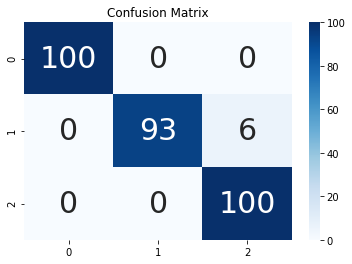

In [502]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()


In [690]:
import pandas as pd
df=pd.read_csv('classification.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


# 1. Solve classification problem using 'classification.csv' dataset

In [ ]:
# example of updating one weight
epochs = 50
lr = 0.1
for _ in range(epochs):
    w1 -= lr * x1 * (y_hat - y) # y_hat is predicted value

## Implement gradient descent on logistic regression

#### Remember that the derivative of loss function has the following formula
<img src="Loss.png">

In [691]:
from sklearn.model_selection import train_test_split
from numpy.random import rand

In [692]:
class Logistic_regression:
    
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=None


    def fit(self, X, y):
        self.y=y
        self.X=np.c_[np.ones(X.shape[0]),X]
        for _ in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        n_samples=X.shape[0]
        self.weights=np.zeros(X.shape[1]+1).reshape(X.shape[1]+1,1)
        #self.weights=rand(X.shape[1]+1).reshape(X.shape[1]+1,1)
        y_predicted=self.sigmoid(np.dot(self.X, self.weights))
        dw=np.dot(self.X.T,(y_predicted-self.y))/n_samples
        self.weights=self.weights-self.learning_rate*dw
        
    def coefs(self):
        return self.weights
        
    def cost_function(self): 
        loss=[]
        for i in range(self.iterations):
            model=np.dot(self.X, self.weights)
            predict_1 = np.dot(self.y.T, np.log(self.sigmoid(model)))
            predict_0=np.dot((1-self.y).T, np.log(1-self.sigmoid(model)))
            err=-sum(predict_1+predict_0)/len(X)
        return loss.append(err)

    def predict(self,X_test): 
        X_test=np.c_[np.ones(X_test.shape[0]),X_test]
        self.X_test=X_test
        y_predicted=self.sigmoid(np.dot(self.X_test,self.weights))
        preds=np.where(y_predicted>0.3,1,0)
        return preds
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

In [693]:
X=df.iloc[:,[0,2,3,4,5,6,7]].values
y=df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 0)

In [694]:
model=Logistic_regression()
model.fit(X_train, y_train)

In [695]:
model.coefs()

array([[-0.00047143],
       [-0.01715   ],
       [-0.006     ],
       [-0.00480714],
       [-0.02255714],
       [-0.00306857],
       [-0.00018678],
       [-0.00119076]])

In [696]:
model.cost_function()

In [697]:
model.predict(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [698]:
Y_pred=model.predict(X_test)
correctly_classified = 0
for count in range( np.size( Y_pred ) ) :     
    if y_test[count] == Y_pred[count] :             
        correctly_classified = correctly_classified + 1
        count=count+1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )

Accuracy on test set by our model       :   73.57142857142858


In [699]:
classifier=LogisticRegression(random_state = 0, max_iter=1000)
mdl=classifier.fit(X_train, y_train)
mdl.coef_, classifier.intercept_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[ 0.04543216, -0.2695544 , -0.09285865,  0.0122629 ,  0.02913919,
          0.59870577, -0.07255546]]),
 array([-1.65720651]))


#### visualise the date, do some EDA, find feature importance

In [722]:
df=pd.read_csv('classification.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


Text(288.61590909090904, 0.5, 'default')

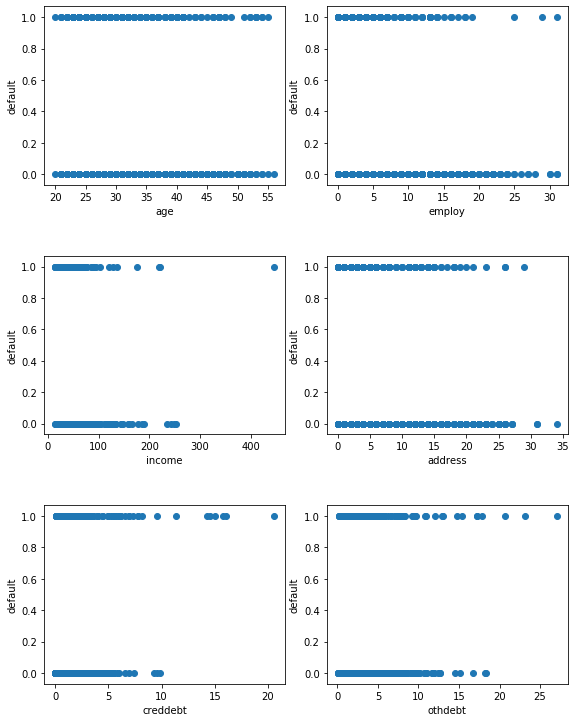

In [723]:
fig, axs = plt.subplots(3, 2)
fig.set_figwidth(8)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0,0].scatter(df['age'], df['default'])
axs[0,0].set_xlabel('age')
axs[0,0].set_ylabel('default')

axs[0,1].scatter(df['employ'], df['default'])
axs[0,1].set_xlabel('employ')
axs[0,1].set_ylabel('default')

axs[1,1].scatter(df['address'], df['default'])
axs[1,1].set_xlabel('address')
axs[1,1].set_ylabel('default')

axs[1,0].scatter(df['income'], df['default'])
axs[1,0].set_xlabel('income')
axs[1,0].set_ylabel('default')

axs[2,0].scatter(df['creddebt'], df['default'])
axs[2,0].set_xlabel('creddebt')
axs[2,0].set_ylabel('default')

axs[2,1].scatter(df['othdebt'], df['default'])
axs[2,1].set_xlabel('othdebt')
axs[2,1].set_ylabel('default')

In [724]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [725]:
df['ed'].value_counts()

no high school    372
high school       198
college degree     87
undergraduate      38
postgraduate        5
Name: ed, dtype: int64

In [726]:
df.corr()

,age,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
employ,0.536497,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [727]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(X)
X_normalized = norm.transform(X)
df=pd.get_dummies(df[['age','ed','employ','address','income','debtinc','creddebt','othdebt','default']])
df.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_college degree,ed_high school,ed_no high school,ed_postgraduate,ed_undergraduate
0,41,17,12,176,9.3,11.359392,5.008608,1,1,0,0,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0,0,0,1,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0,0,0,1,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0,0,0,1,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1,0,1,0,0,0


In [728]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [742]:
X=df[df.columns.difference(['default'])]
X_normalized = norm.transform(X)
kf = KFold(n_splits=5)
test_accuracy = []
train_accuracy = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr = LogisticRegression(max_iter=500)
    model = lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)
    
    test_accuracy.append(accuracy_score(y_test, y_pred))
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    
print('Test accuracy: ',np.mean(test_accuracy) )
print('Train accuracy: ',np.mean(train_accuracy) )

Test accuracy:  0.8099999999999999
Train accuracy:  0.8178571428571428


### with cross_val_score

In [765]:
X=df[df.columns.difference(['default'])]
X_normalized = norm.transform(X)
y=df['default']
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = 0.8, random_state = 0)
lr = LogisticRegression(max_iter=500)
model = lr.fit(X_train,np.ravel(y_train))
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
scores=cross_val_score(model,X_normalized,y, cv=5)
print("Accuracy score: ",np.mean(scores))

Accuracy score:  0.7857142857142856


# 2. Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself

In [769]:
def conf_matrix(y_test,y_pred):
    TP=0
    FP=0
    FN=0
    TN=0
    for i,j in zip(y_test,y_pred):
        if i==j==1:
            TP=TP+1
        elif i==j==0:
            TN=TN+1
        elif i==0 and j==1:
            FP=FP+1
        else:
            FN=FN+1
    print("True Positives:", TP,"True Negatives:", TN, "False Positives:", FP, "False Negatives:", FP)
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    print("Accuracy: ", Accuracy)
    Sens=TP/(TP+FN)
    Spec=TN/(TN+FP)
    Prec=TP/(TP+FP)
    NPV=TN/(TN+FN)
    print('Sensitivity or Recall:', Sens,'\n' 'Specifity:',Spec,'\n' 'Precision', Prec)
    cf=np.array([[TP, FN], [FP, TN]]) 
    print('Confusion Matrix: \n', cf)

In [770]:
conf_matrix(y_test, y_pred)

True Positives: 7 True Negatives: 413 False Positives: 1 False Negatives: 1
Accuracy:  0.75
Sensitivity or Recall: 0.04794520547945205 
Specifity: 0.9975845410628019 
Precision 0.875
Confusion Matrix: 
 [[  7 139]
 [  1 413]]
